In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
stack = 'MD589'
first_sec, last_sec = metadata_cache['section_limits'][stack]

In [6]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

In [9]:
clfs = DataManager.load_classifiers(classifier_id=73)

In [ ]:
for structure in clfs.keys():

# structure = '7N'

    for sec in metadata_cache['valid_sections'][stack]:
    # for sec in [170]:

        out_resolution_um = 10.

        viz, sm = draw_scoremap(clf=clfs[structure], 
    #                             scheme='normalize_mu_region_sigma_wholeImage_(-1,5)', 
                                scheme='none', 
    #                             bbox=(11217, 16886, 13859, 18404),
                                win_id=7,
                                stack=stack, return_scoremap=True, sec=sec,
                                model=model, 
                                 mean_img=mean_img, 
                                 batch_size=batch_size,
                               out_resolution_um=out_resolution_um)

        scoremap_bp_filepath = \
        DataManager.get_downscaled_scoremap_filepath(stack=stack, section=sec, 
                                                     structure=structure,
                                                     detector_id=999,
                                                     out_resolution_um=out_resolution_um)

        create_parent_dir_if_not_exists(scoremap_bp_filepath)
        bp.pack_ndarray_file(sm.astype(np.float16), scoremap_bp_filepath)
        upload_to_s3(scoremap_bp_filepath)


        viz_filepath = \
        DataManager.get_scoremap_viz_filepath_v2(stack=stack, section=sec, 
                                                     structure=structure,
                                                     detector_id=999,
                                                     out_resolution_um=out_resolution_um)

        create_parent_dir_if_not_exists(viz_filepath)
        imsave(viz_filepath, viz)
        upload_to_s3(viz_filepath)

        del viz, sm

locate patches: 0.02 seconds
Not using image_cache.
Load image: 14.23 seconds.
Extract patches: 14.93 seconds


(22134, 1, 224, 224)


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_detector999/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_detector999/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 14.53 seconds.
Extract patches: 15.21 seconds


(21957, 1, 224, 224)


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_detector999/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_detector999/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless.tif"


Not using image_cache.
Load image: 19.91 seconds.
Extract patches: 20.81 seconds


(22041, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless.tif"


Not using image_cache.
Load image: 20.27 seconds.
Extract patches: 20.94 seconds


(22251, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless.tif"


Not using image_cache.
Load image: 20.00 seconds.
Extract patches: 20.69 seconds


(22233, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless.tif"


Not using image_cache.
Load image: 20.07 seconds.
Extract patches: 20.76 seconds


(22476, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless.tif"


Not using image_cache.
Load image: 20.10 seconds.
Extract patches: 20.80 seconds


(22540, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_detector999/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless.tif"


Not using image_cache.
Load image: 20.67 seconds.
Extract patches: 21.36 seconds


(22569, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_detector999/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless.tif"


Not using image_cache.
Load image: 20.15 seconds.
Extract patches: 20.85 seconds


(22671, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless.tif"


Not using image_cache.
Load image: 21.09 seconds.
Extract patches: 21.79 seconds


(22813, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless.tif"


Not using image_cache.
Load image: 19.62 seconds.
Extract patches: 20.36 seconds


(22939, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless.tif"


Not using image_cache.
Load image: 20.48 seconds.
Extract patches: 21.20 seconds


(23267, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless.tif"


Not using image_cache.
Load image: 19.40 seconds.
Extract patches: 20.10 seconds


(23372, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_detector999/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.05 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless.tif"


Not using image_cache.
Load image: 19.77 seconds.
Extract patches: 20.47 seconds


(23619, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_detector999/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.07 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless.tif"


Not using image_cache.
Load image: 19.35 seconds.
Extract patches: 20.05 seconds


(23667, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless.tif"


Not using image_cache.
Load image: 22.10 seconds.
Extract patches: 22.83 seconds


(23712, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless.tif"


Not using image_cache.
Load image: 20.45 seconds.
Extract patches: 21.18 seconds


(23725, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless.tif"


Not using image_cache.
Load image: 19.82 seconds.
Extract patches: 20.54 seconds


(24015, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless.tif"


Not using image_cache.
Load image: 21.20 seconds.
Extract patches: 22.00 seconds


(24175, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_detector999/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless.tif"


Not using image_cache.
Load image: 20.18 seconds.
Extract patches: 20.96 seconds


(24296, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_detector999/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless.tif"


Not using image_cache.
Load image: 20.32 seconds.
Extract patches: 21.07 seconds


(24445, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless.tif"


Not using image_cache.
Load image: 20.30 seconds.
Extract patches: 21.03 seconds


(24463, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless.tif"


Not using image_cache.
Load image: 20.15 seconds.
Extract patches: 20.90 seconds


(24543, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.02 seconds
Not using image_cache.
Load image: 14.82 seconds.
Extract patches: 15.57 seconds


(24482, 1, 224, 224)


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.05 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless.tif"


Not using image_cache.
Load image: 20.32 seconds.
Extract patches: 21.16 seconds


(24633, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_detector999/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless.tif"


Not using image_cache.
Load image: 19.57 seconds.
Extract patches: 20.36 seconds


(24984, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_detector999/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.08 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless.tif"


Not using image_cache.
Load image: 20.51 seconds.
Extract patches: 21.29 seconds


(25131, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless.tif"


Not using image_cache.
Load image: 20.16 seconds.
Extract patches: 20.92 seconds


(24881, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless.tif"


Not using image_cache.
Load image: 20.54 seconds.
Extract patches: 21.33 seconds


(25377, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless.tif"


Not using image_cache.
Load image: 20.21 seconds.
Extract patches: 20.99 seconds


(25267, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_detector999/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.05 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless.tif"


Not using image_cache.
Load image: 20.25 seconds.
Extract patches: 21.03 seconds


(25432, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_detector999/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless.tif"


Not using image_cache.
Load image: 20.37 seconds.
Extract patches: 21.16 seconds


(25358, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless.tif"


Not using image_cache.
Load image: 20.26 seconds.
Extract patches: 21.03 seconds


(25596, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless.tif"


Not using image_cache.
Load image: 20.87 seconds.
Extract patches: 21.66 seconds


(25597, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless.tif"


Not using image_cache.
Load image: 19.92 seconds.
Extract patches: 20.69 seconds


(25811, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless.tif"


Not using image_cache.
Load image: 20.13 seconds.
Extract patches: 20.91 seconds


(25797, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_detector999/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless.tif"


Not using image_cache.
Load image: 21.26 seconds.
Extract patches: 22.05 seconds


(25932, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_detector999/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 15.33 seconds.
Extract patches: 16.11 seconds


(26091, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 15.82 seconds.
Extract patches: 16.61 seconds


(26288, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.28 seconds.
Extract patches: 17.09 seconds


(26267, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 16.20 seconds.
Extract patches: 17.02 seconds


(26630, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 15.72 seconds.
Extract patches: 16.52 seconds


(26611, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_detector999/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.09 seconds.
Extract patches: 16.94 seconds


(26735, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_detector999/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 17.09 seconds.
Extract patches: 17.92 seconds


(26894, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.42 seconds.
Extract patches: 17.25 seconds


(27036, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 17.20 seconds.
Extract patches: 18.09 seconds


(27130, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.46 seconds.
Extract patches: 17.32 seconds


(27267, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 17.06 seconds.
Extract patches: 17.95 seconds


(27390, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_detector999/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 16.75 seconds.
Extract patches: 17.61 seconds


(27447, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_detector999/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.77 seconds.
Extract patches: 17.65 seconds


(27469, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 17.30 seconds.
Extract patches: 18.17 seconds


(27510, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.20 seconds.
Extract patches: 18.07 seconds


(27583, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 16.71 seconds.
Extract patches: 17.60 seconds


(27778, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.60 seconds.
Extract patches: 18.48 seconds


(27811, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_detector999/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.06 seconds.
Extract patches: 17.95 seconds


(28018, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_detector999/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.09 seconds.
Extract patches: 20.00 seconds


(28225, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.46 seconds.
Extract patches: 18.38 seconds


(28425, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 17.80 seconds.
Extract patches: 18.72 seconds


(28519, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.10 seconds.
Extract patches: 18.01 seconds


(28727, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 18.16 seconds.
Extract patches: 19.08 seconds


(28907, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_detector999/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.71 seconds.
Extract patches: 18.62 seconds


(28975, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_detector999/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 20.30 seconds.
Extract patches: 21.23 seconds


(29210, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 19.05 seconds.
Extract patches: 19.97 seconds


(29526, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 17.96 seconds.
Extract patches: 18.89 seconds


(29841, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 18.13 seconds.
Extract patches: 19.12 seconds


(29974, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.06 seconds
Not using image_cache.
Load image: 19.40 seconds.
Extract patches: 20.35 seconds


(30128, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_detector999/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.87 seconds.
Extract patches: 20.83 seconds


(30135, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_detector999/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 20.28 seconds.
Extract patches: 21.22 seconds


(30205, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 20.81 seconds.
Extract patches: 21.79 seconds


(30374, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 19.15 seconds.
Extract patches: 20.28 seconds


(30504, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 18.25 seconds.
Extract patches: 19.20 seconds


(30709, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.05 seconds
Not using image_cache.
Load image: 19.05 seconds.
Extract patches: 20.19 seconds


(30687, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_detector999/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 18.89 seconds.
Extract patches: 19.87 seconds


(30784, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_detector999/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.16 seconds.
Extract patches: 20.14 seconds


(31089, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 21.84 seconds.
Extract patches: 22.86 seconds


(31234, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 18.69 seconds.
Extract patches: 19.65 seconds


(31385, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 18.61 seconds.
Extract patches: 19.80 seconds


(31521, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 19.62 seconds.
Extract patches: 20.85 seconds


(31608, 1, 224, 224)


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_detector999/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 18.27 seconds.
Extract patches: 20.00 seconds


(31528, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_detector999/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.33 seconds.
Extract patches: 20.56 seconds


(31828, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.33 seconds.
Extract patches: 20.88 seconds


(31964, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.98 seconds.
Extract patches: 21.16 seconds


(31892, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 22.35 seconds.
Extract patches: 23.59 seconds


(31863, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.66 seconds.
Extract patches: 20.78 seconds


(31943, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_detector999/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.51 seconds.
Extract patches: 20.64 seconds


(31918, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_detector999/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.04 seconds
Not using image_cache.
Load image: 18.80 seconds.
Extract patches: 19.83 seconds


(32017, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.28 seconds.
Extract patches: 20.33 seconds


(31991, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_detector999/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_detector999/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_detector999_Tz_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_Tz_detector999_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/Tz/MD589/detector999/prep2/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_10.0um_Tz_detector999_scoremapViz.jpg"


locate patches: 0.03 seconds
Not using image_cache.
Load image: 19.32 seconds.
Extract patches: 20.64 seconds


(32343, 1, 224, 224)
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_lossless_grayJpeg.jpg" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_lossless_grayJpeg.jpg" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_lossless_grayJpeg/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_lossless_grayJpeg.jpg"


Not using image_cache.


(549, 714, 3) (549, 714)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_10.0um_detector999_Tz_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD589/MD589_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_10.0um_detector999/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_10.0um_detector999_Tz_scoremap.bp"


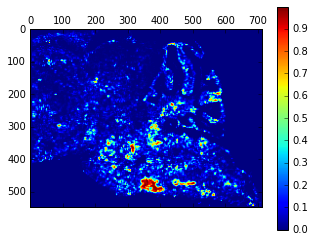

In [19]:
%matplotlib inline
plt.figure(figsize=(10,10));
plt.matshow(sm);
plt.colorbar();

In [41]:
display_image(viz)

/home/yuncong/Brain/learning/tmp.jpg